In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [30]:
df=pd.read_csv('used_cars_UK.csv')
df

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,4723,Renault Megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3681,4724,Audi A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3682,4725,BMW 3 Series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3683,4726,Honda Accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


# Preprocessing Part 1

In [31]:
df.select_dtypes(include='object').nunique()

,0
title,469
Fuel type,6
Body type,10
Engine,34
Gearbox,2
Emission Class,6
Service history,1


In [32]:
df['Engine']=df['Engine'].str.replace('L','')
df['Engine']=df['Engine'].astype('float')
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN


In [33]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN


In [34]:
df['Service history']=df['Service history'].fillna('Not Null')
df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,Not Null
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,Not Null
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,Not Null


# EDA

<ipython-input-35-17d5c0cb9ab7>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-35-17d5c0cb9ab7>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-35-17d5c0cb9ab7>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-35-17d5c0cb9ab7>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-35-17d5c0cb9ab7>:14: UserWarning: set_ticklabels() should only be used with a

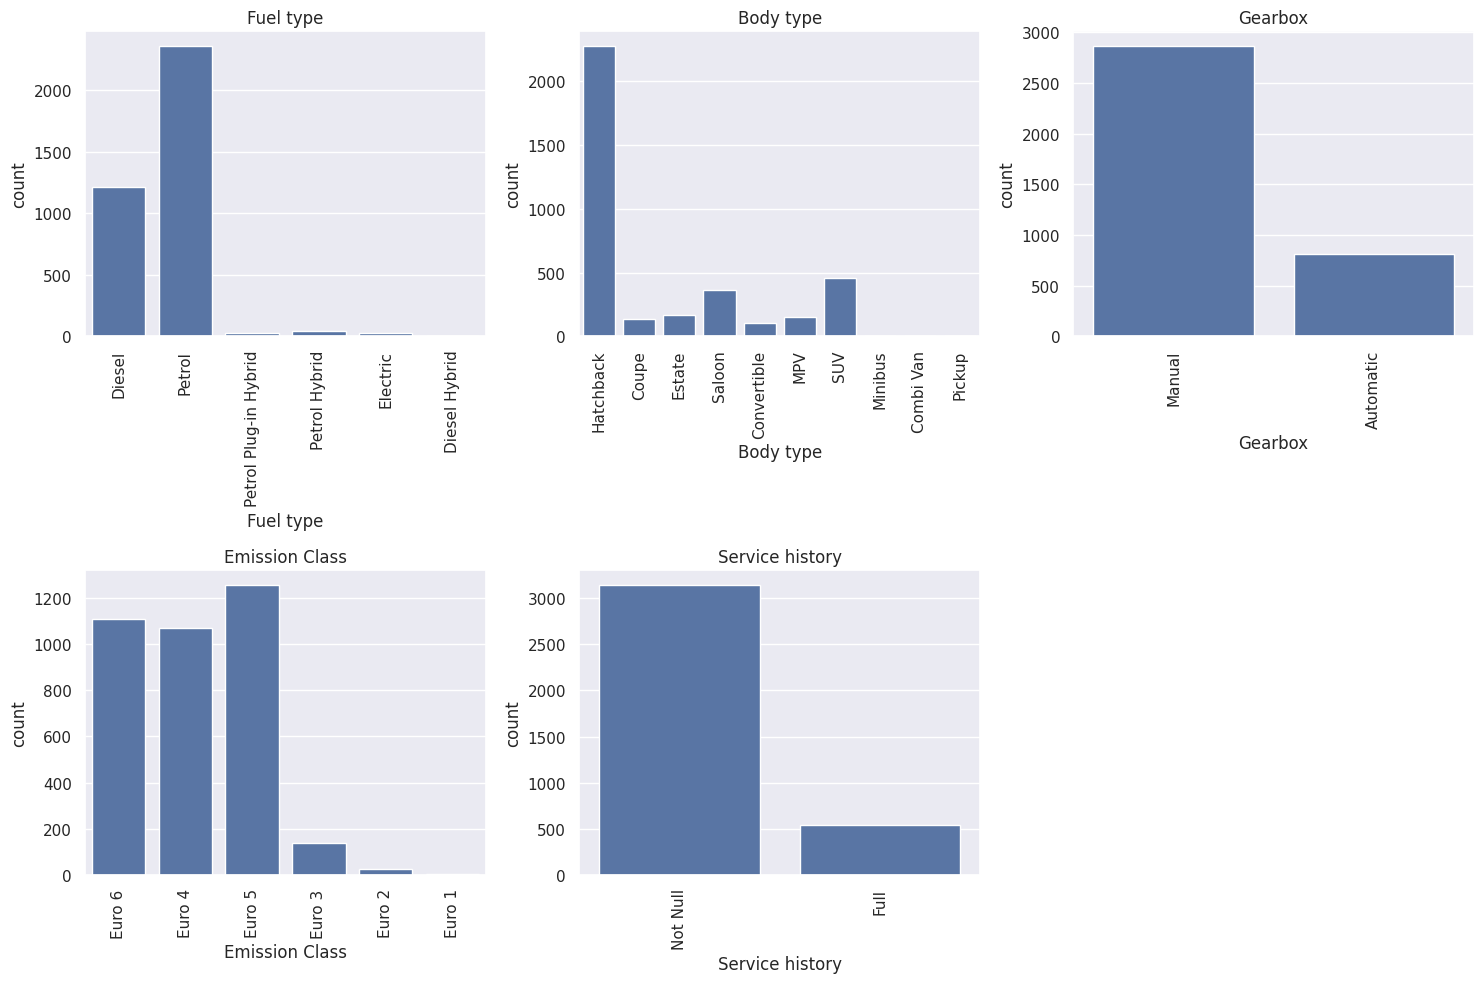

In [35]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
cat_vars.remove('title')

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  top_values=df[var].value_counts().index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  axs[i].set_title(var)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

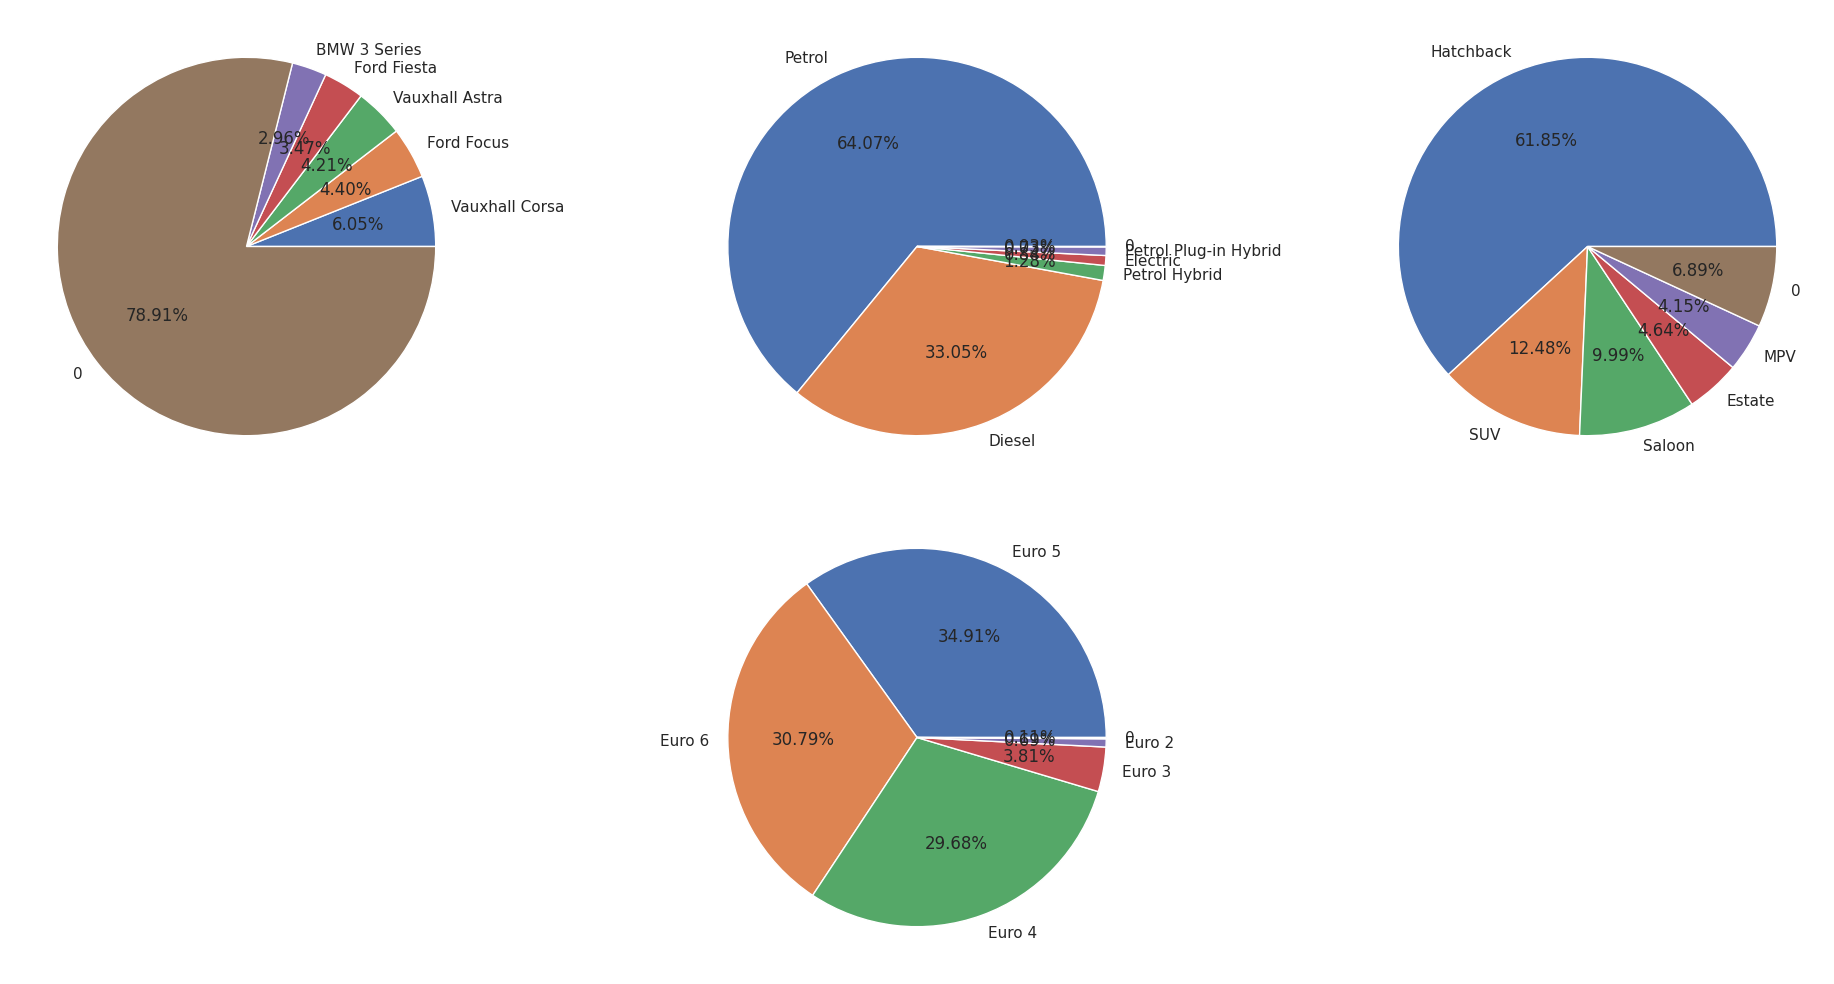

In [52]:
cat_cols=[col for col in df.columns if col!='Country' and df[col].dtypes=='object']
max_categories=5

num_cols=len(cat_cols)
num_rows=(num_cols+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,5*num_rows))
axs=axs.flatten()

for i,col in enumerate(cat_cols):
  if i < len(axs):
    cat_counts=df[col].value_counts()

    if len(cat_counts) > max_categories:
      cat_counts_top=cat_counts[:max_categories]
      cat_counts_other=pd.Series(cat_counts[max_categories:].sum())
      cat_counts=pd.concat([cat_counts_top,cat_counts_other])
      axs[i].pie(x=cat_counts,labels=cat_counts.index,autopct="%1.2f%%")

fig.delaxes(axs[3])
fig.delaxes(axs[5])

fig.tight_layout()
plt.show()

<ipython-input-66-66e623452139>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price',y='title',data=top10,palette='viridis')


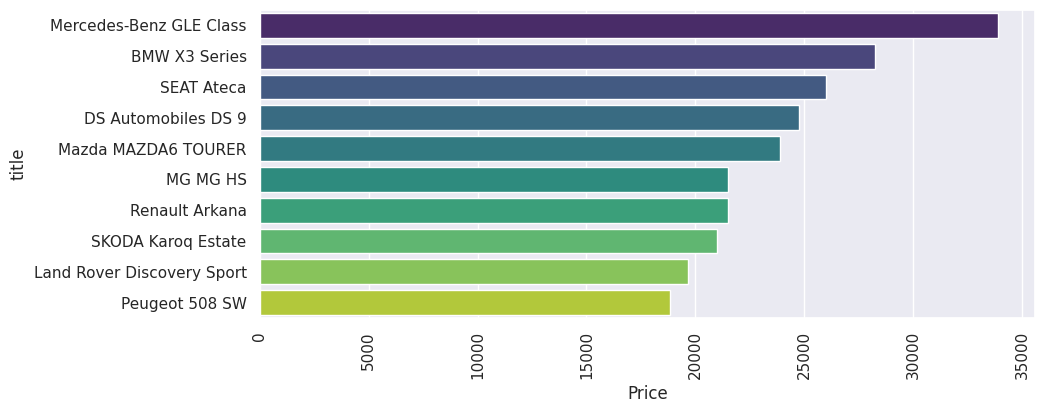

In [66]:
avg_price=df.groupby(df['title'])['Price'].mean().reset_index()
# top10=avg_price.sort_values(by='Price',ascending=False)
# top10=top10.head()
top10=avg_price.nlargest(10,'Price')

plt.figure(figsize=(10,4))
sns.barplot(x='Price',y='title',data=top10,palette='viridis')
# plt.bar(top10['title'],top10['Price'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-69-c0c20b499365>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-69-c0c20b499365>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-69-c0c20b499365>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-69-c0c20b499365>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-69-c0c20b499365>:11: UserWarning: set_ticklabels() should only be used with a

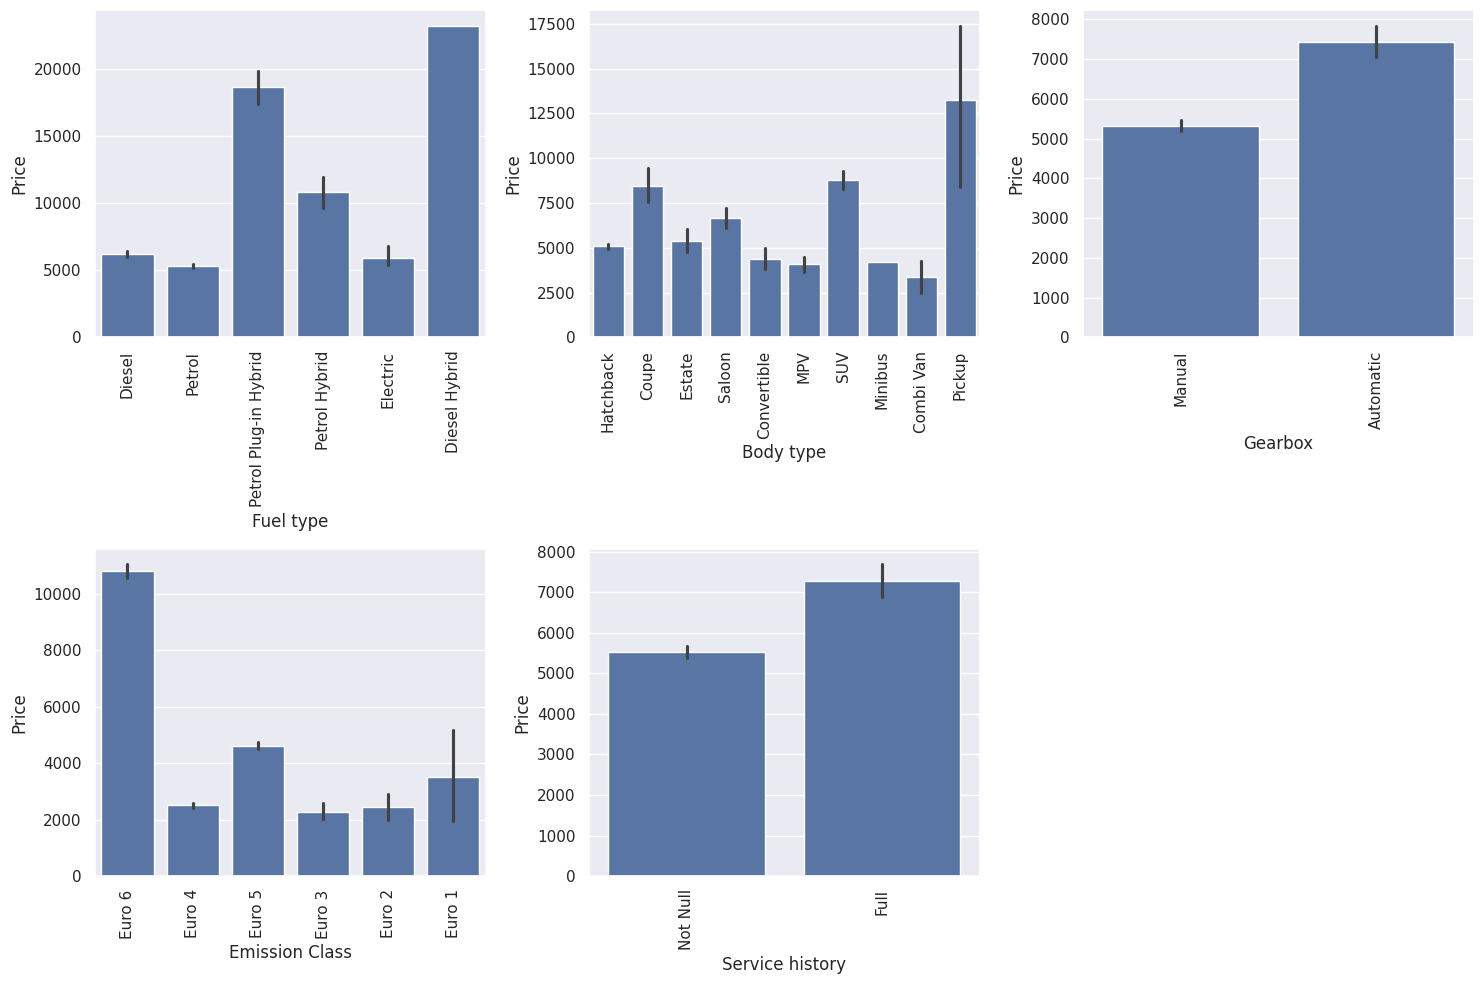

In [69]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
cat_vars.remove('title')

ncols=len(cat_vars)
nrows=(ncols+2)//3
fig,axs=plt.subplots(nrows=nrows,ncols=3,figsize=(15,5*nrows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  sns.barplot(x=var,y='Price',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

if ncols < len(axs):
  for i in range(ncols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

# Preprocessing Part 2

In [70]:
df=df.drop(columns=['Previous Owners'],axis=1)
df

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,Not Null
1,Vauxhall Corsa,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,Not Null
3,MINI Hatch,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,Not Null
...,...,...,...,...,...,...,...,...,...,...,...,...
3680,Renault Megane,1395,76202,2006,Petrol,Hatchback,1.6,Manual,5.0,5.0,Euro 4,Not Null
3681,Audi A4,6990,119000,2012,Petrol,Saloon,2.0,Manual,4.0,5.0,Euro 5,Not Null
3682,BMW 3 Series,3995,139000,2013,Diesel,Saloon,2.0,Manual,4.0,5.0,Euro 5,Not Null
3683,Honda Accord,1390,179190,2007,Diesel,Estate,2.2,Manual,5.0,5.0,Euro 4,Full


In [71]:
df=df.drop(columns=['title'],axis=1)
df

,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,Not Null
1,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,Not Null
3,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,Not Null
...,...,...,...,...,...,...,...,...,...,...,...
3680,1395,76202,2006,Petrol,Hatchback,1.6,Manual,5.0,5.0,Euro 4,Not Null
3681,6990,119000,2012,Petrol,Saloon,2.0,Manual,4.0,5.0,Euro 5,Not Null
3682,3995,139000,2013,Diesel,Saloon,2.0,Manual,4.0,5.0,Euro 5,Not Null
3683,1390,179190,2007,Diesel,Estate,2.2,Manual,5.0,5.0,Euro 4,Full


In [72]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for i in df.columns:
  df[i]=encoder.fit_transform(df[i])

<Axes: >

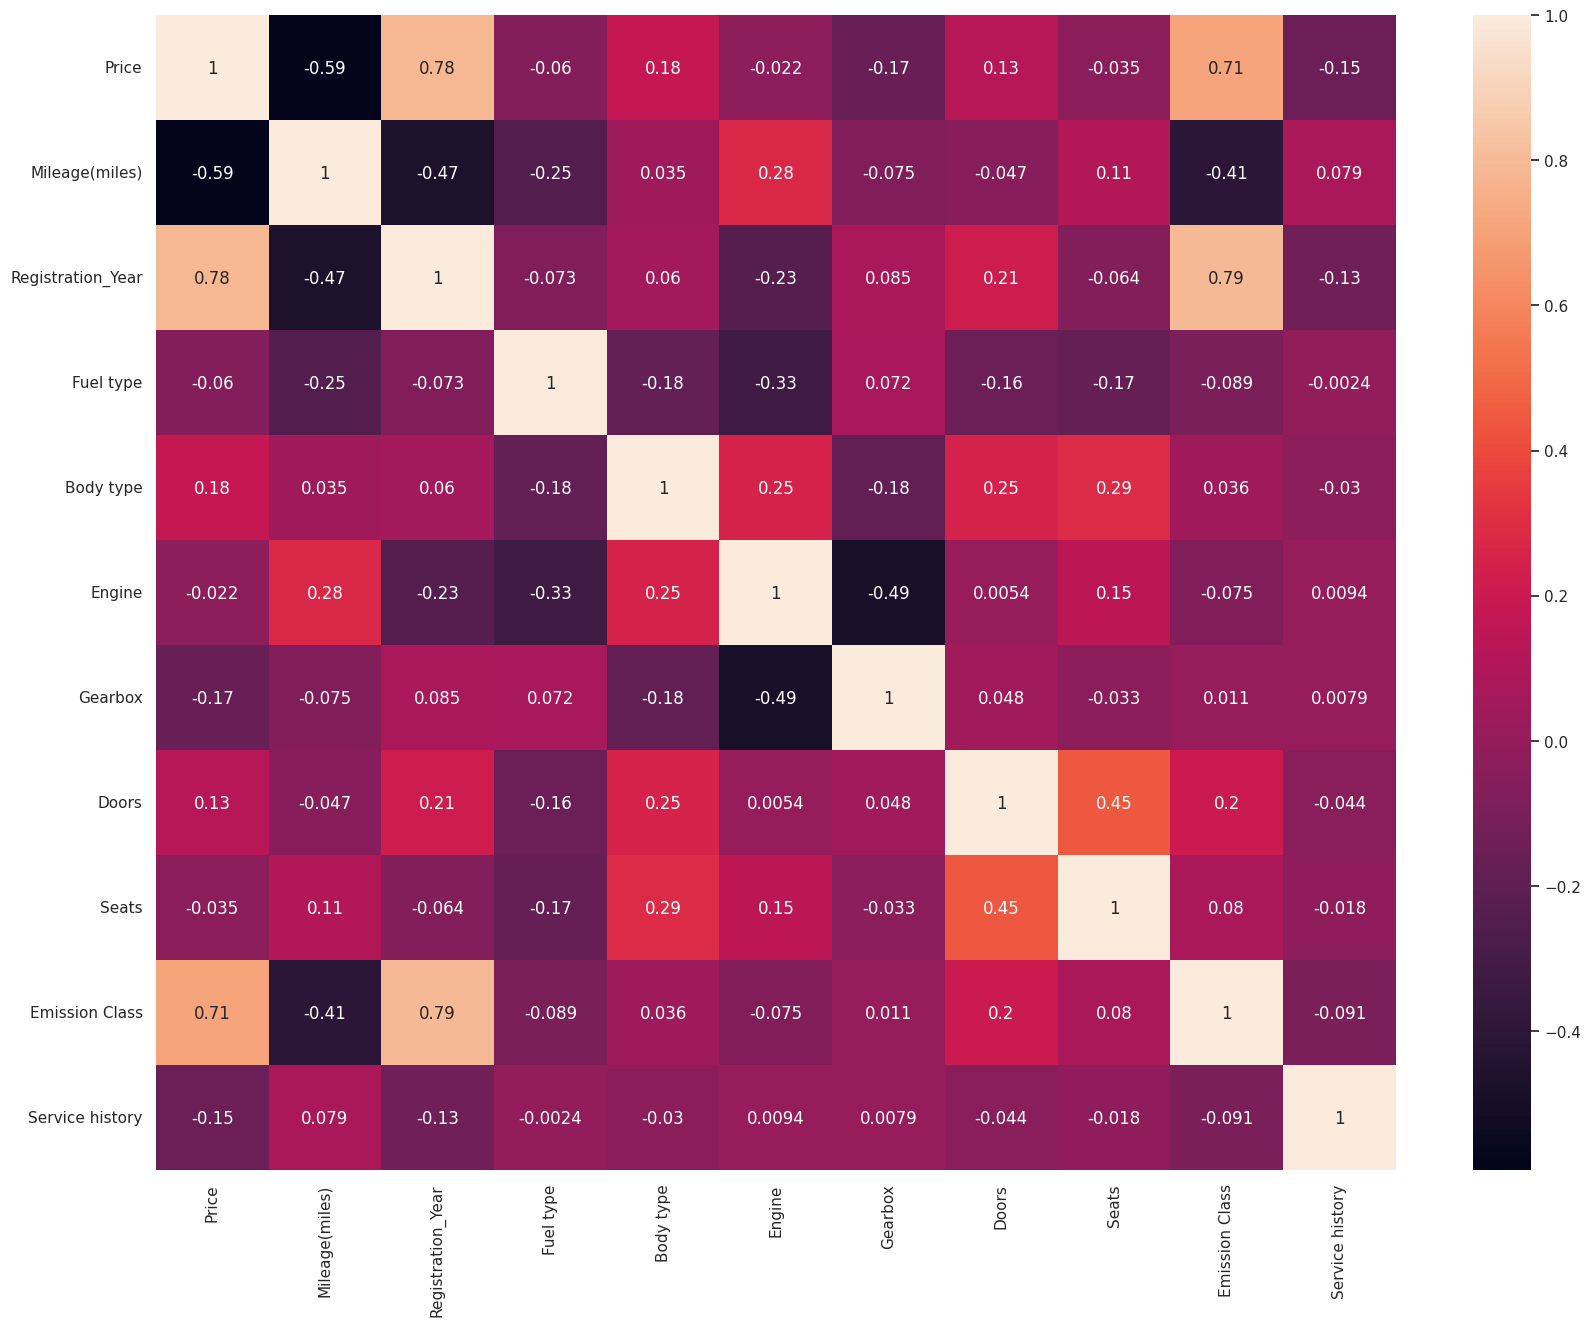

In [73]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [75]:
from scipy import stats

selected_columns=['Mileage(miles)']
zscores=np.abs(stats.zscore(df[selected_columns]))

outlier=np.where(zscores > 3)[0]
df.drop(df.index[outlier])

,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,477,701,32,0,4,6,1,3,3,5,1
1,70,1001,24,3,4,4,1,1,3,3,0
2,24,1450,27,3,4,6,1,3,3,4,1
3,151,1131,26,3,4,6,1,1,2,3,0
4,33,944,29,0,4,5,1,3,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...
3680,59,803,22,3,4,8,1,3,3,3,1
3681,486,1358,28,3,9,12,1,2,3,4,1
3682,290,1463,29,0,9,12,1,2,3,4,1
3683,58,1554,23,0,3,14,1,3,3,3,0


# Model Building

In [76]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='Price',axis=1)
y=df['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=8,random_state=42,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, random_state=42)

In [78]:
from sklearn.metrics import mean_squared_error

y_pred=rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)

MSE: 6735.23042223487


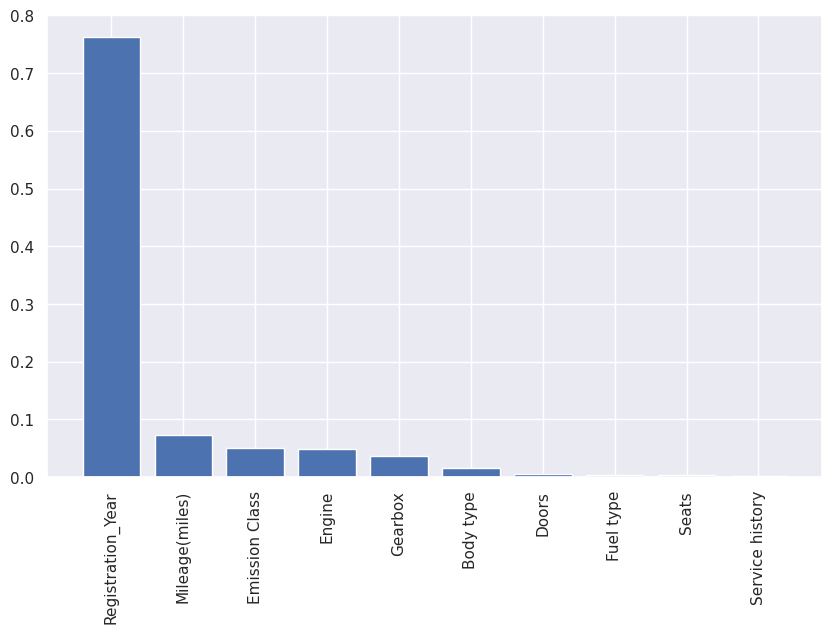

In [83]:
imp_df=pd.DataFrame({
    'kolom':X_train.columns,
    'importance':rf.feature_importances_
})
topimp=imp_df.sort_values(by='importance',ascending=False)
topimp=topimp.nlargest(10,'importance')
plt.figure(figsize=(10,6))
plt.bar(topimp['kolom'],topimp['importance'])
plt.xticks(rotation=90)
plt.show()